In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [33]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


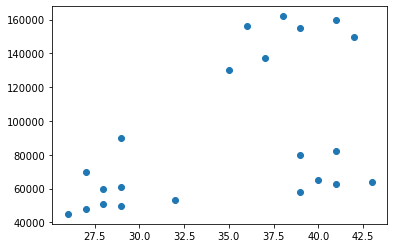

In [34]:
plt.scatter(df['Age'],df['Income($)'])

In [35]:
from sklearn.cluster import KMeans

In [36]:
km = KMeans(n_clusters = 3)

In [37]:
y_predict = km.fit_predict(df[['Age','Income($)']])

In [38]:
df['cluster'] = y_predict

In [48]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income($)')

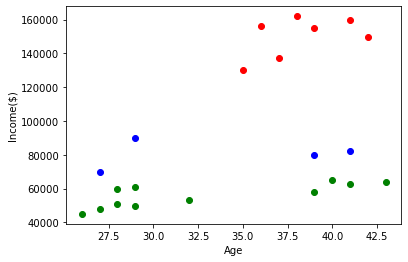

In [40]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'],df1['Income($)'],color = 'green')
plt.scatter(df2['Age'],df2['Income($)'],color = 'red')
plt.scatter(df3['Age'],df3['Income($)'],color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income($)')


In [46]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [47]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [50]:
model = KMeans(n_clusters = 3)
y_predict = model.fit_predict(df[['Age','Income($)']])

In [53]:
df['cluster'] = y_predict

In [60]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


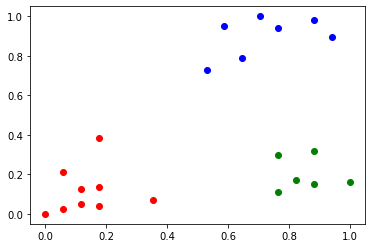

In [71]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Age'],df1['Income($)'],color = 'green')
plt.scatter(df2['Age'],df2['Income($)'],color = 'red')
plt.scatter(df3['Age'],df3['Income($)'],color = 'blue')


In [67]:
model.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

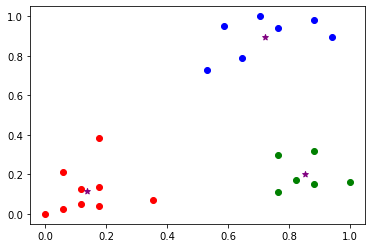

In [73]:
plt.scatter(df1['Age'],df1['Income($)'],color = 'green')
plt.scatter(df2['Age'],df2['Income($)'],color = 'red')
plt.scatter(df3['Age'],df3['Income($)'],color = 'blue')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = 'purple',marker = '*')

### Elbow Method

In [80]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Error')

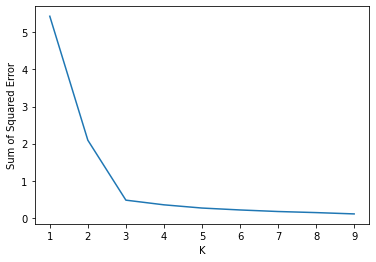

In [81]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

We choose the k-value where the line bends like an elbow